<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [26]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
len(X_train)

60000

In [28]:
len(X_test)

10000

In [29]:
X_train.shape

(60000, 28, 28)

In [30]:
X_train[0].shape


(28, 28)

In [31]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [32]:
for row in X_train[0]:
  row=row.tolist()
  for i in row:
    print(str(i).ljust(4), end='')
  print()

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   3   18  18  18  126 136 175 26  166 255 247 127 0   0   0   0   
0   0   0   0   0   0   0   0   30  36  94  154 170 253 253 253 253 253 225 172 253 242 195 64  0   0   0   0   
0   0   0   0   0   0   0   49  238 253 253 253 253 253 253 253 253 251 93  82  82  56  39  0   0   0   0   0   
0   0   0   0   0   0   0   18  219 253 253 253 253 253 198 182 247 241 0   0   0   0   0   0   

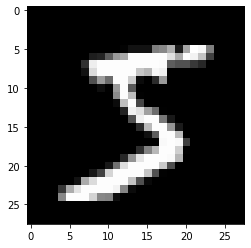

In [34]:
plt.imshow(X_train[0],cmap='gray') #RGB---BGR

In [11]:
y_train[0]

5

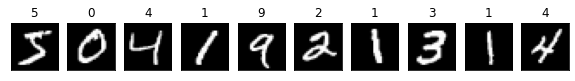

In [12]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

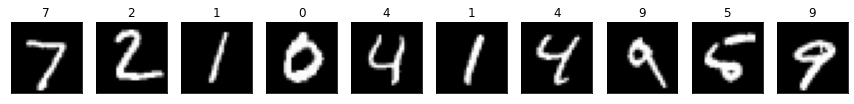

In [13]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(15, 8))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [14]:
X_train = X_train / 255 #0--255=> 0--1
X_test = X_test / 255

In [15]:
for row in X_train[0]:
  row=row.tolist()
  for i in row:
    print(str(round(i,2)).ljust(4), end='')
  print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.010.070.070.070.490.530.690.1 0.651.0 0.970.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.120.140.370.6 0.670.990.990.990.990.990.880.670.990.950.760.250.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.190.930.990.990.990.990.990.990.990.990.980.360.320.320.220.150.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.070.860.990.990.990.990.990.780.710.970.950.0 0.0 0.0 0.0 0.0 0.0 

In [16]:
len(X_train)

60000

In [17]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [18]:
X_train_flattened.shape

(60000, 784)

In [19]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
model = keras.Sequential()
layer_1=keras.layers.Dense(10, input_shape=(784,), activation='softmax')
model.add(layer_1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5,validation_data=(X_test_flattened,y_test),verbose=1)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4677 - accuracy: 0.8769 - val_loss: 0.3136 - val_accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9154 - val_loss: 0.2852 - val_accuracy: 0.9186
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9209 - val_loss: 0.2754 - val_accuracy: 0.9225
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9239 - val_loss: 0.2686 - val_accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9255 - val_loss: 0.2715 - val_accuracy: 0.9238


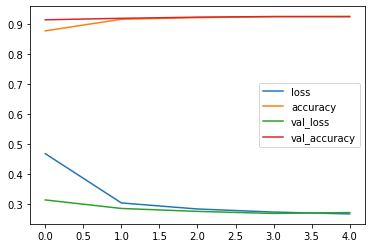

In [21]:
import pandas as pd
losses = pd.DataFrame(model.history.history)


In [22]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.467729,0.876867,0.313558,0.9137
1,0.303572,0.915417,0.285206,0.9186
2,0.283404,0.920917,0.275371,0.9225
3,0.273170,0.923917,0.268609,0.9246
4,0.267001,0.925517,0.271527,0.9238


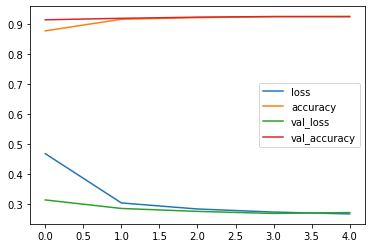

In [23]:
losses.plot()

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.9200 - val_loss: 0.1458 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1253 - accuracy: 0.9637 - val_loss: 0.1076 - val_accuracy: 0.9681
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0884 - accuracy: 0.9732 - val_loss: 0.0896 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.1038 - val_accuracy: 0.9687
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.0805 - val_accuracy: 0.9752


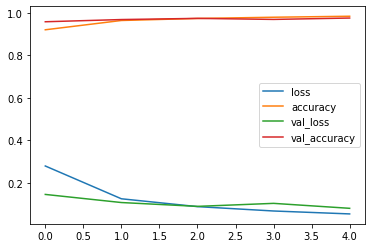

In [24]:
model = keras.Sequential()

layer_1=keras.layers.Dense(100, input_shape=(784,), activation='relu',name='layer_1')
model.add(layer_1)

layer_2=keras.layers.Dense(10, activation='softmax',name='output_layer')
model.add(layer_2)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5,validation_data=(X_test_flattened,y_test),verbose=1)
# to check loss and accuracy for test dataset --- model.evaluate(xtest,ytest)
losses = pd.DataFrame(model.history.history)
losses.plot()

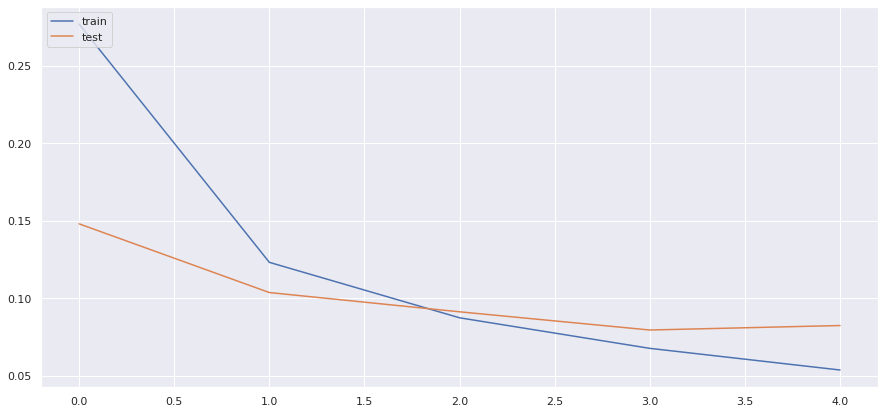

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

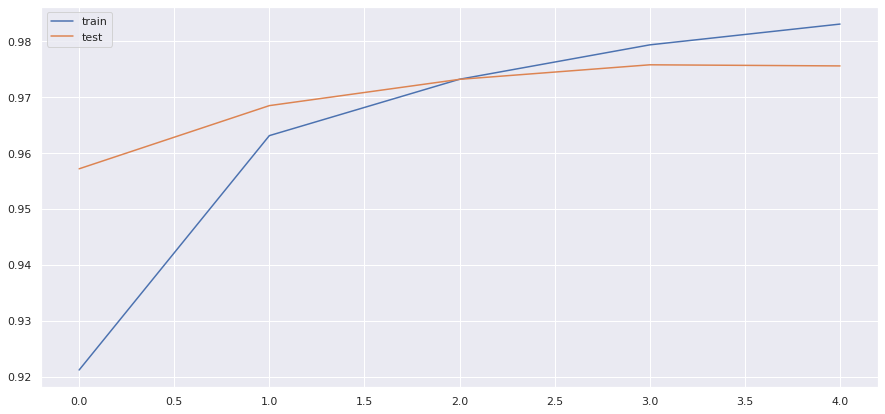

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9778


[0.076420359313488, 0.9778000116348267]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [ ]:
#                                                 2ms/step - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0764 - val_accuracy: 0.9778   
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9760


[0.08823630958795547, 0.9760000109672546]

In [ ]:
predictions=model.predict_classes(X_test)
predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

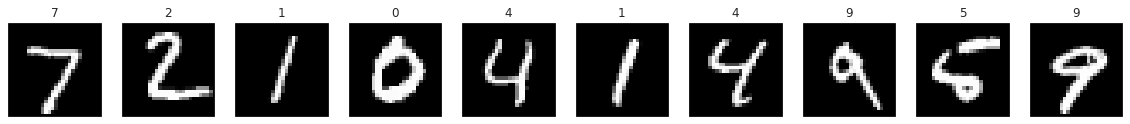

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(20, 10))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
neuron_predictions=model.predict(X_test)
neuron_predictions

array([[5.9345323e-10, 1.1762712e-10, 1.3856210e-07, ..., 9.9984086e-01,
        2.6431388e-07, 2.0700215e-06],
       [1.1980763e-11, 3.2854747e-05, 9.9996710e-01, ..., 9.3647899e-19,
        2.5827460e-09, 8.5173479e-14],
       [6.2902444e-08, 9.9936634e-01, 6.0560025e-05, ..., 8.1310376e-05,
        2.8012687e-04, 3.8492143e-08],
       ...,
       [8.2795946e-15, 1.3692438e-14, 5.7988797e-16, ..., 2.6663750e-08,
        4.9503659e-09, 2.2456302e-06],
       [6.3863254e-13, 7.8723263e-16, 2.8816007e-14, ..., 9.0656562e-13,
        4.0537751e-07, 1.2243467e-15],
       [1.6913266e-14, 6.1683511e-22, 5.9403036e-13, ..., 2.6462963e-20,
        4.4628544e-15, 5.0312078e-18]], dtype=float32)

In [ ]:
neuron_predictions[0]

array([5.9345323e-10, 1.1762712e-10, 1.3856210e-07, 1.5644742e-04,
       4.5584808e-12, 7.1851623e-08, 2.7128166e-14, 9.9984086e-01,
       2.6431388e-07, 2.0700215e-06], dtype=float32)

In [ ]:
np.argmax(neuron_predictions[0])

7

In [ ]:
np.argmax(neuron_predictions[0:10],axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_predicted=np.argmax(neuron_predictions,axis=1)
y_predicted

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    0,    1,   12,    1,    4,    0],
       [   0, 1122,    3,    1,    0,    2,    4,    1,    2,    0],
       [   1,    2,  995,    9,    4,    0,    4,    6,   11,    0],
       [   0,    0,    1,  996,    0,    4,    2,    4,    1,    2],
       [   0,    0,    1,    0,  959,    0,   12,    1,    0,    9],
       [   1,    0,    0,   16,    1,  863,    6,    0,    2,    3],
       [   0,    2,    0,    1,    1,    6,  945,    0,    3,    0],
       [   2,    2,   11,    8,    1,    0,    0,  992,    1,   11],
       [   1,    0,    1,    6,    2,    4,    2,    2,  952,    4],
       [   2,    2,    0,   11,    7,    2,    1,    2,    5,  977]],
      dtype=int32)>

Text(111.5, 0.5, 'Actual  digit')

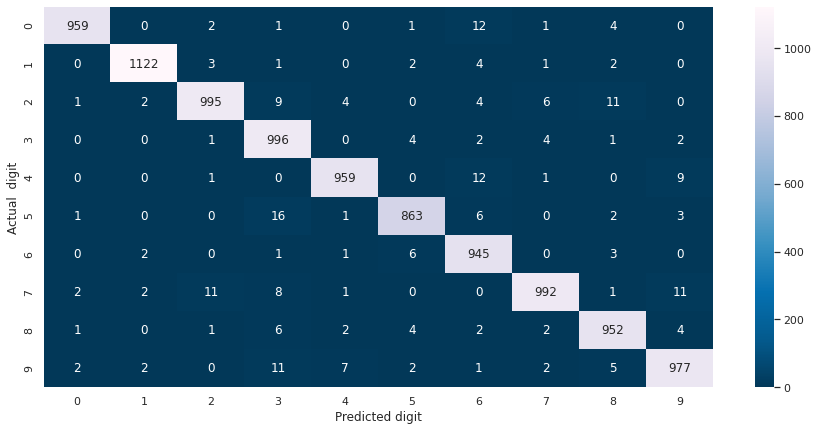

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(cm,annot=True,cmap='PuBu_r',fmt='g')
plt.xlabel("Predicted digit")
plt.ylabel("Actual  digit") 